In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,classification_report

Using TensorFlow backend.


In [2]:
df=pd.read_csv("Imputed.csv")

In [3]:
df

,HINCP_x,SMOCP,PUMA,NP,BDSP,INSP,RMSP,VALP,TAXAMT,ACR_<1.0>,...,YBL_<13.0>,YBL_<14.0>,YBL_<15.0>,YBL_<16.0>,YBL_<17.0>,YBL_<18.0>,YBL_<19.0>,YBL_<20.0>,YBL_<21.0>,YBL_<22.0>
0,47900.0,1042.0,3108,4,3.0,890.0,6.0,165000.0,3650.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36100.0,691.0,2501,2,3.0,600.0,6.0,35000.0,525.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100000.0,1042.0,3502,1,0.0,890.0,1.0,165000.0,3650.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45000.0,1042.0,3526,2,2.0,890.0,5.0,165000.0,3650.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88000.0,603.0,1204,3,2.0,20.0,4.0,140.0,525.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246497,30000.0,1366.0,3208,1,4.0,0.0,11.0,150000.0,6500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246498,150000.0,2603.0,3208,4,4.0,1200.0,8.0,275000.0,10500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246499,85000.0,751.0,2601,2,3.0,550.0,6.0,145000.0,5750.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246500,117500.0,1168.0,3407,2,4.0,990.0,10.0,500000.0,11500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X=df.drop("HINCP_x",axis=1)
y=df["HINCP_x"]

In [5]:
y=np.reshape(y.values,(-1,1))

In [6]:
ss=StandardScaler()
min_max=MinMaxScaler()



In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8,random_state=2020)

In [27]:
X_t,X_val,y_t,y_val=train_test_split(X_train,y_train,train_size=.8,random_state=2020)

In [30]:
ss_x=StandardScaler()
mm_x=MinMaxScaler()

In [31]:
X_t_ss=ss_x.fit_transform(X_t)
X_val_ss=ss_x.transform(X_val)

In [32]:
X_t_mm=mm_x.fit_transform(X_t)
X_val_mm=mm_x.transform(X_val)

In [16]:
X_train_mm=min_max.fit_transform(X_train)

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [17]:
model=Sequential()
model.add(Dense(50 ,activation="relu",input_dim=48))
model.add(Dense(25 ,activation="selu"))
# model.add(Dense(25 ,activation="relu"))
# model.add(Dense(25 ,activation="relu"))
model.add(Dense(1, ))#activation='linear'))
model.compile(loss='mse',optimizer="adam",metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae",coeff_determination])
# add Dropouts layers when overfitting
#SS helps with outliers
#add in l1

# ,input_shape=(8,)

In [18]:
model1=Sequential()
model1.add(Dense(50 ,activation="relu",input_dim=48))
model1.add(Dense(25 ,activation="selu"))
# model.add(Dense(25 ,activation="relu"))
# model.add(Dense(25 ,activation="relu"))
model1.add(Dense(1, ))#activation='linear'))
model1.compile(loss='mse',optimizer="adam",metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae",coeff_determination])
# add Dropouts layers when overfitting
#SS helps with outliers
#add in l1

# ,input_shape=(8,)

In [19]:
model2=Sequential()
model2.add(Dense(50 ,activation="relu",input_dim=48))
# model.add(Dense(25 ,activation="relu"))
# model.add(Dense(25 ,activation="relu"))
model2.add(Dense(25 ,activation="selu"))
model2.add(Dense(1, ))#activation='linear'))
model2.compile(loss='mse',optimizer="adam",metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae",coeff_determination])
# add Dropouts layers when overfitting
#SS helps with outliers
#add in l1,




# ,input_shape=(8,)

In [20]:
# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
#                            mode='auto')
# callbacks_list = [early_stop]
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                2450      
_________________________________________________________________
dense_9 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 26        
Total params: 3,751
Trainable params: 3,751
Non-trainable params: 0
_________________________________________________________________


In [21]:
history=model.fit(X_train_mm,y_train,epochs=50,batch_size=50,validation_split=.2)#callbacks=callbacks_list)

Train on 157760 samples, validate on 39441 samples
Epoch 1/50
157760/157760 [==============================] - 4s 25us/step - loss: 10493887887.9026 - root_mean_squared_error: 115695.7500 - mae: 62395.6328 - coeff_determination: -0.2959 - val_loss: 7846002906.2760 - val_root_mean_squared_error: 101105.4688 - val_mae: 53828.7812 - val_coeff_determination: 0.1277
Epoch 2/50
157760/157760 [==============================] - 4s 23us/step - loss: 6963757998.1501 - root_mean_squared_error: 96143.9766 - mae: 50740.2305 - coeff_determination: 0.1897 - val_loss: 6973739045.7045 - val_root_mean_squared_error: 92470.7344 - val_mae: 48665.2500 - val_coeff_determination: 0.2336
Epoch 3/50
157760/157760 [==============================] - 5s 32us/step - loss: 6272482926.4828 - root_mean_squared_error: 90086.3672 - mae: 46599.4922 - coeff_determination: 0.2685 - val_loss: 6440836527.9371 - val_root_mean_squared_error: 88285.2812 - val_mae: 46058.4766 - val_coeff_determination: 0.2836
Epoch 4/50
157760/

In [22]:
history1=model1.fit(X_train_mm,y_train,epochs=50,batch_size=50,validation_split=.2)#callbacks=callbacks_list)

Train on 157760 samples, validate on 39441 samples
Epoch 1/50
157760/157760 [==============================] - 4s 28us/step - loss: 10081231981.0467 - root_mean_squared_error: 113310.2734 - mae: 61235.5195 - coeff_determination: -0.2392 - val_loss: 7702257886.4950 - val_root_mean_squared_error: 99189.5156 - val_mae: 52692.6680 - val_coeff_determination: 0.1487
Epoch 2/50
157760/157760 [==============================] - 4s 27us/step - loss: 6791878697.5578 - root_mean_squared_error: 94354.6484 - mae: 49662.1289 - coeff_determination: 0.2085 - val_loss: 6802979860.2283 - val_root_mean_squared_error: 90995.9609 - val_mae: 47898.2305 - val_coeff_determination: 0.2497
Epoch 3/50
157760/157760 [==============================] - 4s 27us/step - loss: 6139025054.4746 - root_mean_squared_error: 88839.4141 - mae: 45916.2383 - coeff_determination: 0.2796 - val_loss: 6317684037.1715 - val_root_mean_squared_error: 87006.2656 - val_mae: 45405.7305 - val_coeff_determination: 0.2959
Epoch 4/50
157760/1

In [23]:
history2=model2.fit(X_train_ss,y_train,epochs=50,batch_size=50,validation_split=.2)#callbacks=callbacks_list)

Train on 157760 samples, validate on 39441 samples
Epoch 1/50
157760/157760 [==============================] - 5s 34us/step - loss: 9711632544.4300 - root_mean_squared_error: 113803.8828 - mae: 62014.9102 - coeff_determination: -0.2707 - val_loss: 6398557637.8887 - val_root_mean_squared_error: 96750.5312 - val_mae: 47143.9688 - val_coeff_determination: 0.2138
Epoch 2/50
157760/157760 [==============================] - 5s 34us/step - loss: 5663092529.2333 - root_mean_squared_error: 90397.0703 - mae: 44036.8555 - coeff_determination: 0.2820 - val_loss: 5816912807.1325 - val_root_mean_squared_error: 86356.9297 - val_mae: 43521.4219 - val_coeff_determination: 0.3121
Epoch 3/50
157760/157760 [==============================] - 5s 33us/step - loss: 5388932276.9087 - root_mean_squared_error: 84029.4688 - mae: 42367.3281 - coeff_determination: 0.3221 - val_loss: 5666397505.6275 - val_root_mean_squared_error: 82266.9609 - val_mae: 42703.1328 - val_coeff_determination: 0.3300
Epoch 4/50
157760/15

In [56]:
# min_maxy.inverse_transform([[.0022]])

array([[-7521.16]])

In [57]:
# min_maxy.inverse_transform([[.0020]])

array([[-7855.6]])

In [60]:
# (0.0019)**.5

0.04358898943540673

In [33]:
# ssy.inverse_transform([.6009])

array([142854.86490422])

dict_keys(['val_loss', 'val_root_mean_squared_error', 'val_mae', 'val_coeff_determination', 'loss', 'root_mean_squared_error', 'mae', 'coeff_determination'])


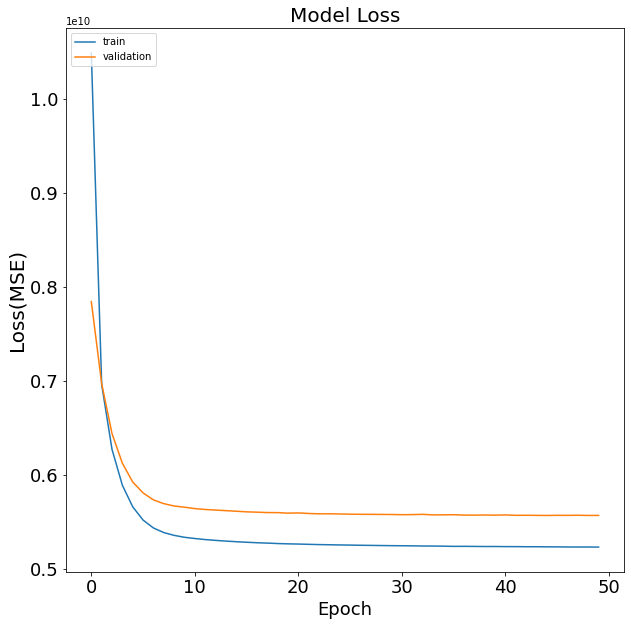

In [24]:
print(history.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
plt.savefig("model results",transparent=True,bbox_inches="tight",)
plt.show();

dict_keys(['val_loss', 'val_root_mean_squared_error', 'val_mae', 'val_coeff_determination', 'loss', 'root_mean_squared_error', 'mae', 'coeff_determination'])


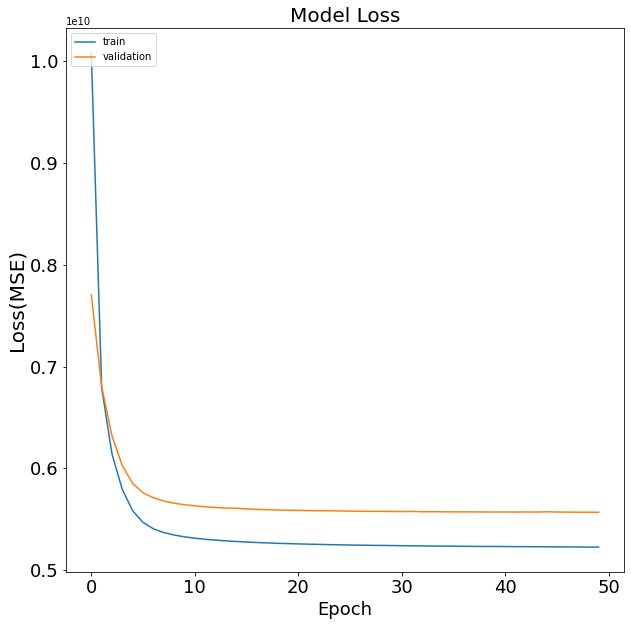

In [25]:
print(history1.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
plt.savefig("model results",transparent=True,bbox_inches="tight",)
plt.show();

dict_keys(['val_loss', 'val_root_mean_squared_error', 'val_mae', 'val_coeff_determination', 'loss', 'root_mean_squared_error', 'mae', 'coeff_determination'])


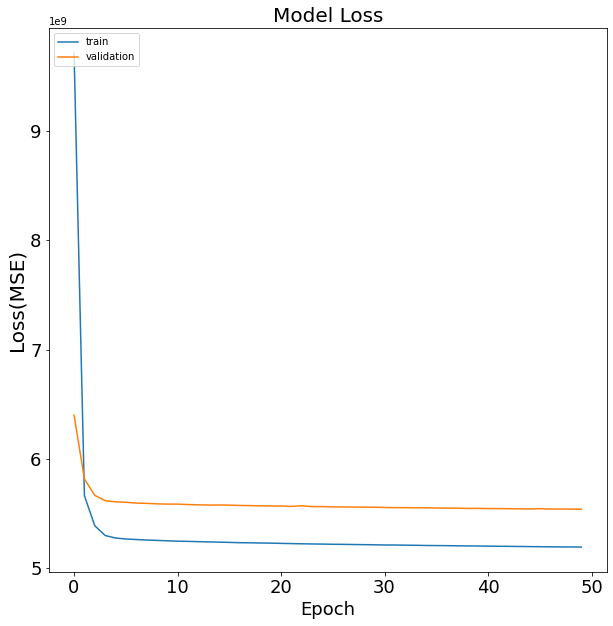

In [26]:
print(history2.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
plt.savefig("model results",transparent=True,bbox_inches="tight",)
plt.show();

In [60]:
y_test

array([[35000.],
       [55100.],
       [69100.],
       ...,
       [88400.],
       [75100.],
       [ 4980.]])

In [14]:
# y_test_ss=ss.transform(y_test)
# X_test_ss=ss.transform(X_test)
y_test_mm=min_maxy.transform(y_test)
X_test_mm=min_max.transform(X_test)

In [15]:
y_hat=model.predict(X)

In [ ]:
y_hat1=model1.predict(X_test_mm)

In [ ]:
y_hat2=model2.predict(X_test_mm)

In [16]:
y_hat

array([[0.04237843],
       [0.04521351],
       [0.03610778],
       ...,
       [0.03473723],
       [0.04014838],
       [0.01233021]], dtype=float32)

In [116]:
# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
#                            mode='auto')
# callbacks_list = [early_stop]
# history_es = model_es.fit(X_train_s, np.array(y_train),
#                           validation_data=(X_test_s, np.array(y_test)),
#                          epochs=40, batch_size=None, callbacks=callbacks_list)

In [ ]:
# y_test_mm=min_max.inverse_transform(y)
#invert normalize
# X_test_mm=min_max.inverse_transform(X_test_mm)
y_hat=min_maxy.inverse_transform(y_hat)
# X_test_ss=ss.inverse_transform(X_test_ss)
print("X inputs=%s ,Actual=%s, Predictied=%s" % (X_test.values[0],y_test[0],y_hat[0]))
# print(y_hat[0:20])
# mae=avergae diff between predicted and actual

In [ ]:
# y_test_mm=min_max.inverse_transform(y)
#invert normalize
# X_test_mm=min_max.inverse_transform(X_test_mm)
y_hat=min_maxy.inverse_transform(y_hat)
# X_test_ss=ss.inverse_transform(X_test_ss)
print("X inputs=%s ,Actual=%s, Predictied=%s" % (X_test.values[0],y_test[0],y_hat[0]))
# print(y_hat[0:20])
# mae=avergae diff between predicted and actual

In [ ]:
# y_test_mm=min_max.inverse_transform(y)
#invert normalize
# X_test_mm=min_max.inverse_transform(X_test_mm)
y_hat=min_maxy.inverse_transform(y_hat)
# X_test_ss=ss.inverse_transform(X_test_ss)
print("X inputs=%s ,Actual=%s, Predictied=%s" % (X_test.values[0],y_test[0],y_hat[0]))
# print(y_hat[0:20])
# mae=avergae diff between predicted and actual